In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov8

/content/drive/MyDrive/Colab Notebooks/yolov8


In [4]:
pwd


'/content/drive/MyDrive/Colab Notebooks/yolov8'

In [5]:
ls

data.yml  e_waste_dataset/  runs/  yolov8n.pt  yolov8s.pt


In [6]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yml epochs=100 imgsz=224 batch=12 plots=True visualize=True save=True iou=0.5  augment=True agnostic_nms=True nms=True


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yml, epochs=100, time=None, patience=100, batch=12, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=True, agnostic_nms=True, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

In [9]:
!ls runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1719896579.bb99bcd0c250.3238.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5400.jpg  weights
P_curve.png					    train_batch5401.jpg
PR_curve.png					    train_batch5402.jpg


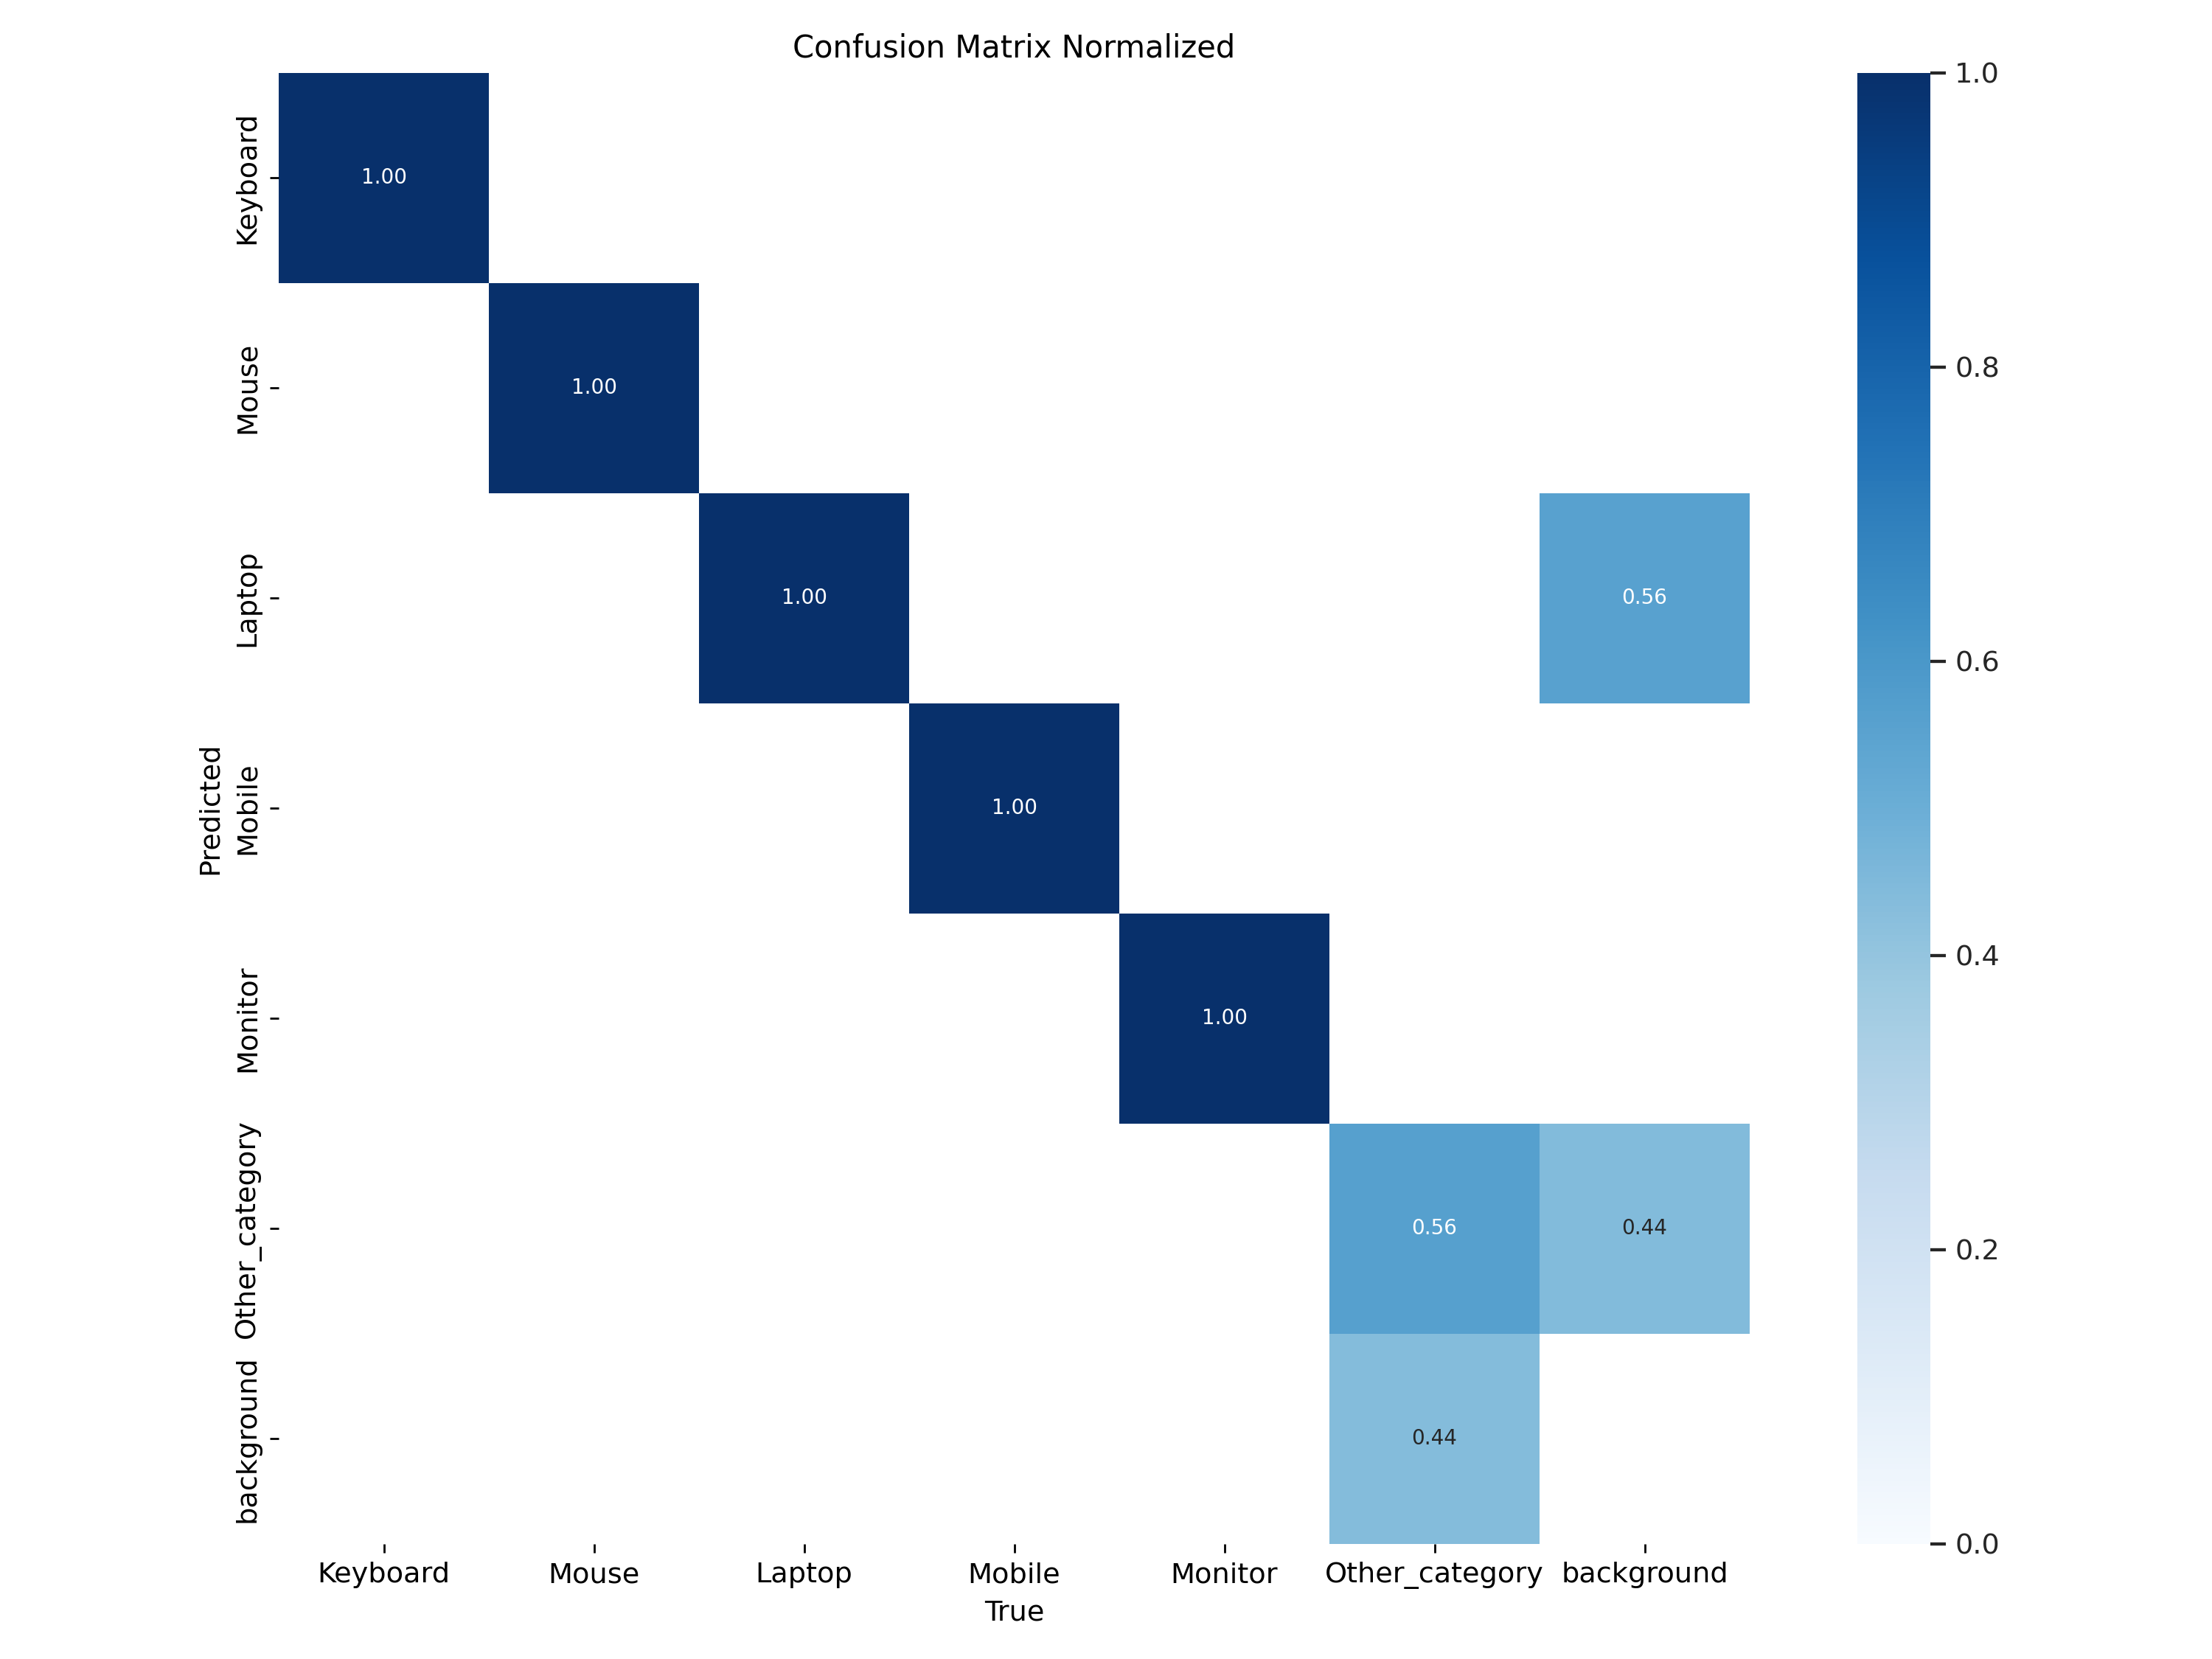

In [10]:
Image(filename='runs/detect/train/confusion_matrix_normalized.png', width=800)

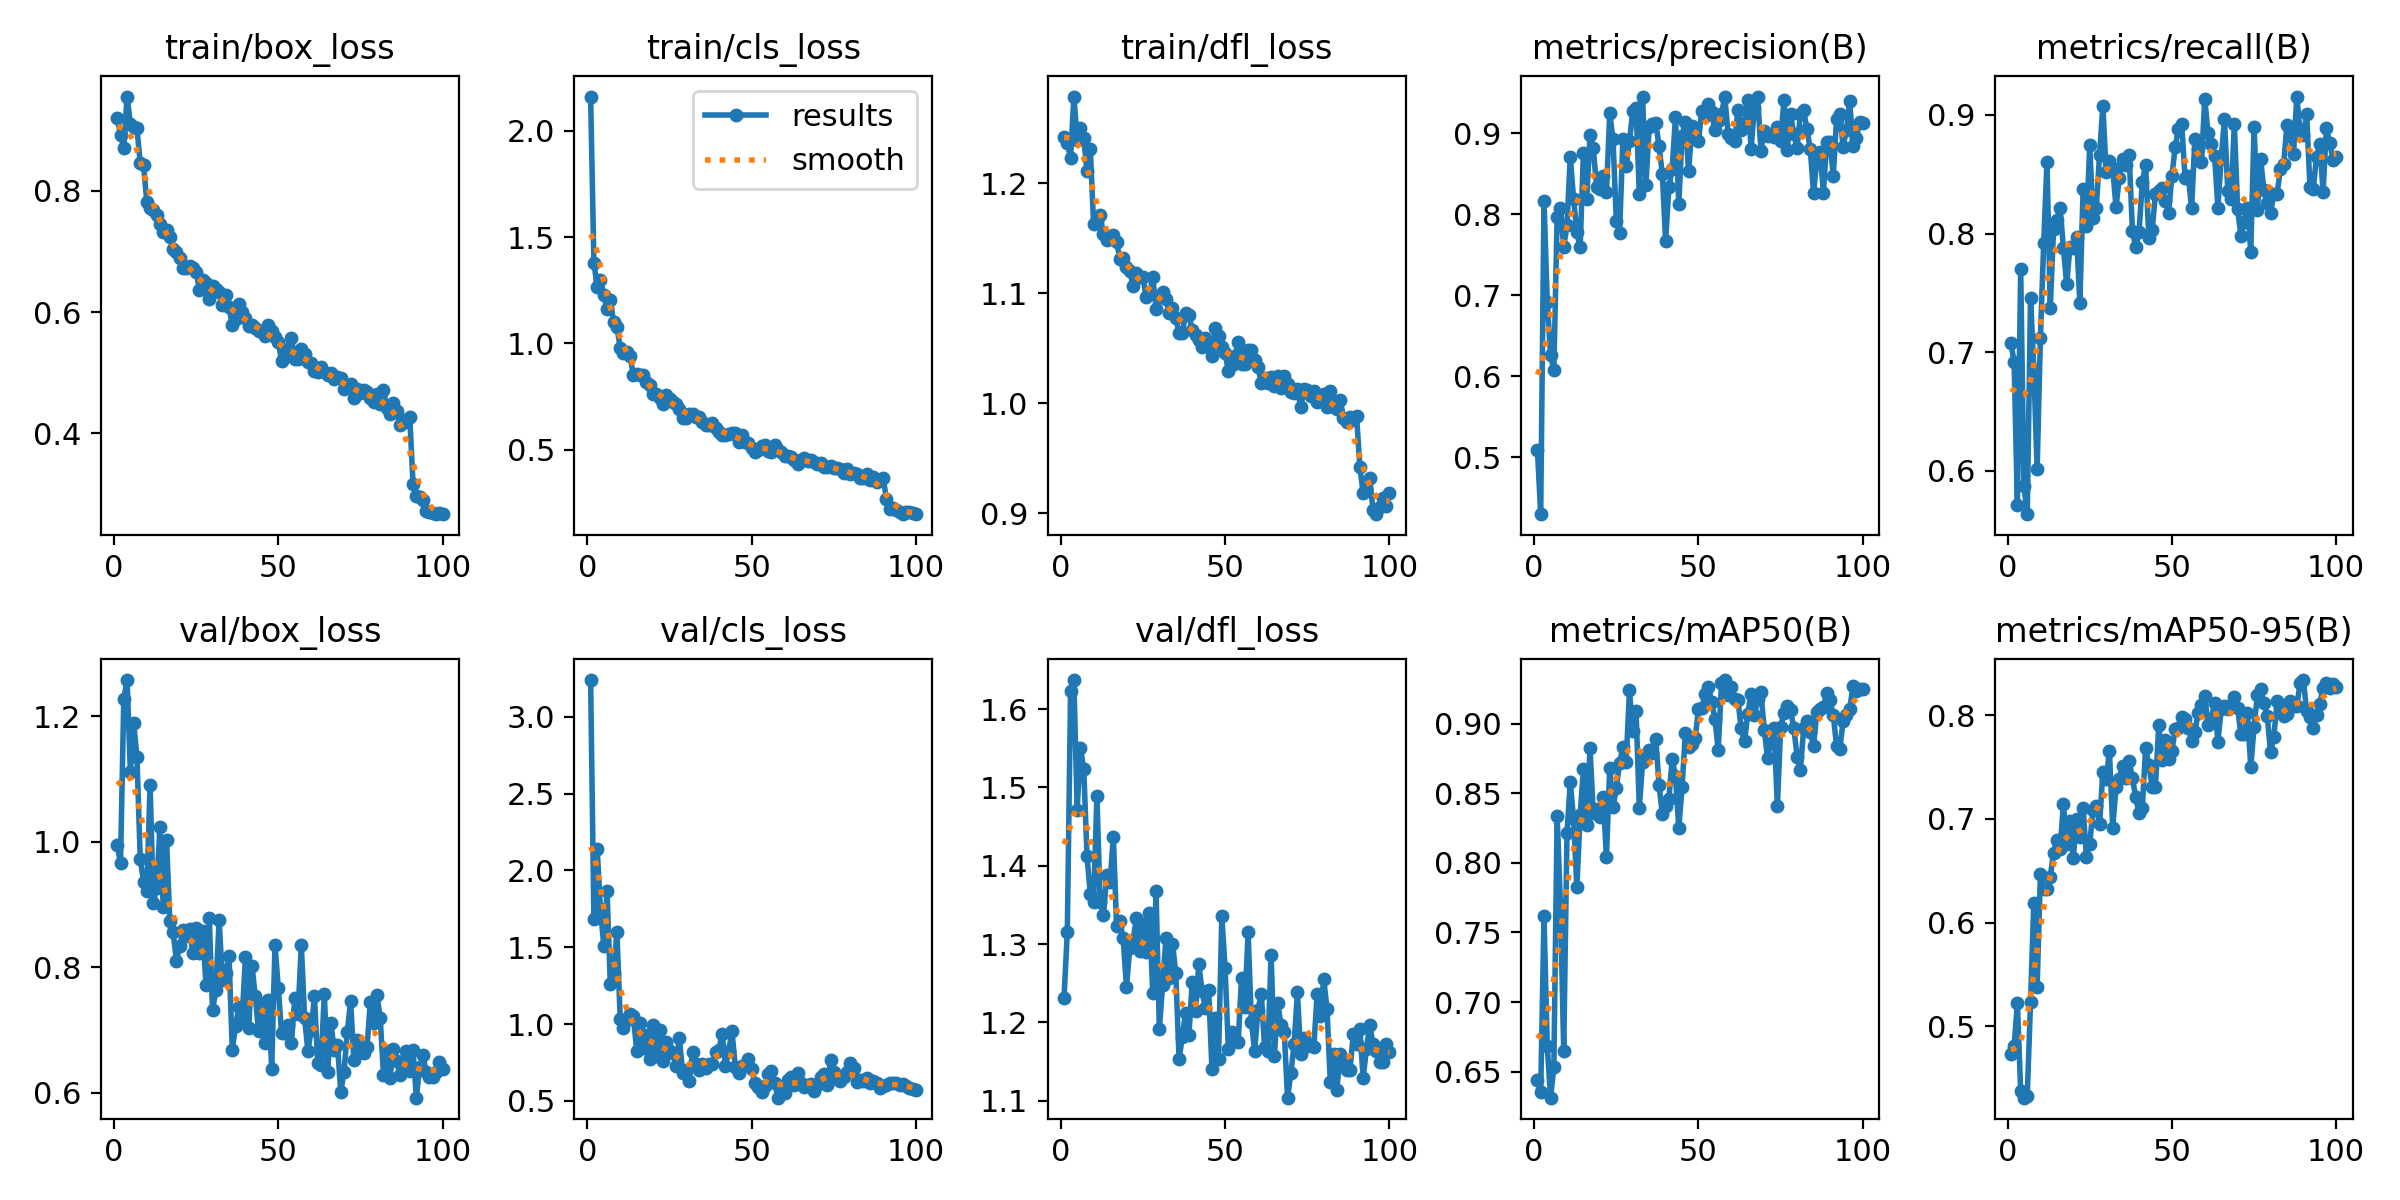

In [11]:
Image(filename='runs/detect/train/results.png', width=800)

In [13]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yml

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.10it/s]
                   all         60         69      0.874      0.877      0.913      0.835
              Keyboard         10         10          1      0.978      0.995      0.938
                 Mouse         11         12          1      0.942      0.995      0.944
                Laptop         10         11      0.685          1      0.925      0.845
                Mobile         10         10      0.961        0.8      0.962      0.914
               Monitor         10         10          1      0.977      0.995      0.963
        Oth

In [14]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.75 source=e_waste_dataset/test/images

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/test/images/Keyboard_0.jpg: 224x224 1 Keyboard, 7.5ms
image 2/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/test/images/Keyboard_1.jpg: 224x224 1 Keyboard, 7.3ms
image 3/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/test/images/Keyboard_2.jpg: 224x224 1 Keyboard, 7.6ms
image 4/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/test/images/Keyboard_3.jpg: 224x224 1 Keyboard, 7.4ms
image 5/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/test/images/Keyboard_4.jpg: 224x224 1 Keyboard, 7.8ms
image 6/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/test/images/Keyboard_5.jpg: 224x224 1 Laptop, 7.4ms
image 7/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_datase

In [16]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.75 source=testing_images

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/6 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/240_F_459561452_LsAsx5peSnZQZj1kt2cSSJckP9suSSqb.jpg: 192x224 1 Other_category, 70.2ms
image 2/6 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/African_Bush_Elephant.jpg: 224x160 (no detections), 70.4ms
image 3/6 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/IMG_20231030_155358.jpg: 192x224 1 Mouse, 8.2ms
image 4/6 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/IMG_20231030_155642.jpg: 192x224 1 Monitor, 11.8ms
image 5/6 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/IMG_20231030_155647.jpg: 192x224 1 Keyboard, 8.7ms
image 6/6 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/IMG_20231130_144551_HDR.jpg: 192x224 3 Mouses, 7.8ms
Speed: 1.2ms preprocess, 29.5ms inference, 97.4ms postpr

In [17]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.75 source=testing_images/SELF

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/17 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/SELF/01.jpeg: 224x224 1 Monitor, 8.6ms
image 2/17 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/SELF/02.jpeg: 224x224 1 Monitor, 7.9ms
image 3/17 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/SELF/03.jpeg: 224x224 1 Monitor, 7.6ms
image 4/17 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/SELF/04.jpeg: 224x224 1 Monitor, 7.4ms
image 5/17 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/SELF/05.jpeg: 224x224 1 Monitor, 7.5ms
image 6/17 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/SELF/06.jpeg: 224x224 1 Monitor, 7.6ms
image 7/17 /content/drive/MyDrive/Colab Notebooks/yolov8/testing_images/SELF/08.jpeg: 224x224 1 Keyboard, 7.9ms
image 8/17 /content/drive/MyDrive/Colab Notebooks/yol

In [19]:
!yolo export model='runs/detect/train/weights/best.pt' format=tflite

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 10, 1029) (21.4 MB)

TensorFlow SavedModel: starting export with tensorflow 2.15.0...

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: slimming with onnxslim 0.1.31...
ONNX: export success ✅ 2.3s, saved as 'runs/detect/train/weights/best.onnx' (42.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 155, Total Ops 410, % non-converted = 37.80 %
 * 155 ARITH ops

- arith.constant:  155 occurrences  (f32: 131, i32: 24)



  (f32: 8)
  (f32: 18)
  (f32: 64)
  (f32: 58)
  (f32: 3)
  (f32: 59)
  (f32: 7)
  (f32: 6)
  (f32: 2)
  (f32: 1)
  (f32: 20)
